# **1. Introduction and Overview**

# Defining the Question

Build a multilinear regression model predicting the life expectancy of the given population.

# Objectives
**Main Objective**

To build a multilinear regression model that will predict the life expectancy of a given population.

**Specific Objectives**

To investigate if immunization has an impact on life expectancy.
To determine if schooling affects life expectancy. 
To determine whether adult mortality rates affect life expectancy.

# Metric of Success
The model will be considered a success when it achieves a low RMSE.

# Problem Statement
Although there have been a lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that the effect of immunization and human development index was not taken into account in the past. Also, some of the past research was done using multiple linear regression based on a data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations in this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

# Data Description
1. Country: Name of the country listed
2. Status: Developed or Developing status
3. Life expectancy: Life Expectancy in age
4. Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
5. Infant Deaths: Number of Infant Deaths per 1000 population
6. Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
7. Percentage Expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
8. Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
9. Measles: number of reported cases per 1000 population
10. BMI: Average Body Mass Index of entire population
11. Under-five Deaths: Number of under-five deaths per 1000 population
12. Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
13. Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
14. Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
15. HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
16. GDP: Gross Domestic Product per capita (in USD)
17. Population: Population of the country
18. Thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
19. Thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
20. Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
21. Schooling: Number of years of Schooling(years)
22. Year: Year listed in the dataset

# Experimental Design
1. Installing and importing libraries
2. Reviewing the data
3. Checking data for errors/anomalies
4. Tidying the dataset
5. Performing Exploratory Data Analysis
6. Performing predictions
7. Conclusions and Recommendations

# **2. Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# **3. Loading Dataset**

In [ ]:
#Loading the dataset
data = pd.read_csv("/content/Life Expectancy Data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#Checking the last rows
data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


# **4. Reviewing Dataset**


In [ ]:
#Getting the shape of the dataset
data.shape

(2938, 22)

There are 2938 records and 22 columns

In [ ]:
#Checking for sum of duplicates
data.duplicated().sum()

0

There are no duplicates present

In [ ]:
#Checking for missing values
data.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Not all the columns will be used to build the model for regression. Doing further feature engineering on the columns to determine which to drop and which to use.

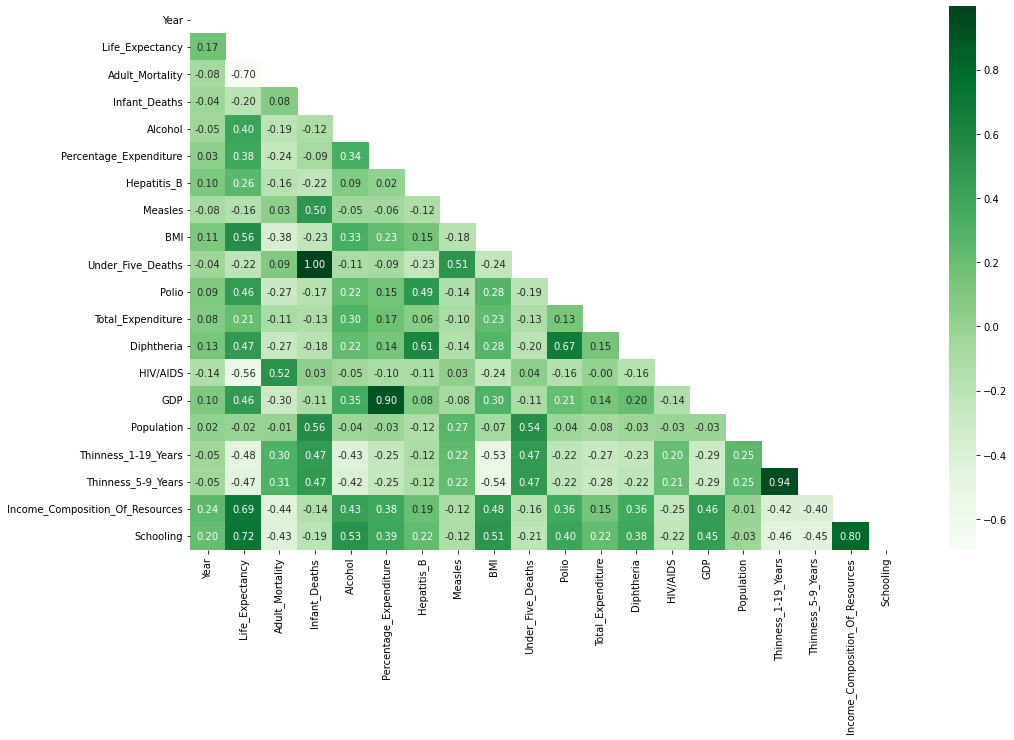

In [ ]:
# Checking for correlation

plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(),annot=True,cmap="Greens",fmt=".2f", mask=mask);
plt.show();


From the above heatmap, it is clear that some features have multicolinearity:


*   Schooling and Income_Composition_Of_Resources have a correaltion of 0.80
*   Percentage_Expenditure and GDP have a correlation of 0.9

*   Under_Five_Deaths and Infant_Deaths have a correaltion of 1.0
*   Thinness_5-9_Years and Thinness_1-19_Years have a correlation of 0.94. 

Features that had more missing values will be dropped and the ones to keep with be filled. 





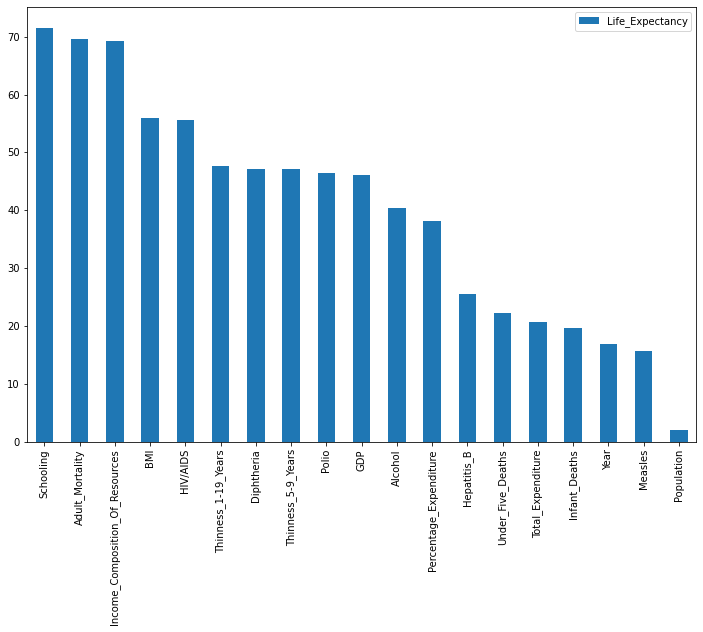

In [ ]:
#A plot to show the features most correlated with Life Expectancy.
pd.DataFrame(abs(data.corr()['Life_Expectancy'].drop('Life_Expectancy')*100).sort_values(ascending=False)).plot.bar(figsize = (12,8))

From the above plot, schooling is highly correlated with Life Expectancy, followed by Income Composition of Resources then adult mortality. 
The heat map above will help in eliminating features that had multicolinearity.  

The features to be used for modeling are:
1. Schooling: to determine effect of schooling on life expectancy.
2. Adult Mortality: to determine its effect on life expectancy.
3. Diphtheria: to determine the effect of immunization on life expectancy.
4. Status: to compare life expectancy between developed and developing countries.
5. BMI: to determine the effect of weight versus height on life expectancy.


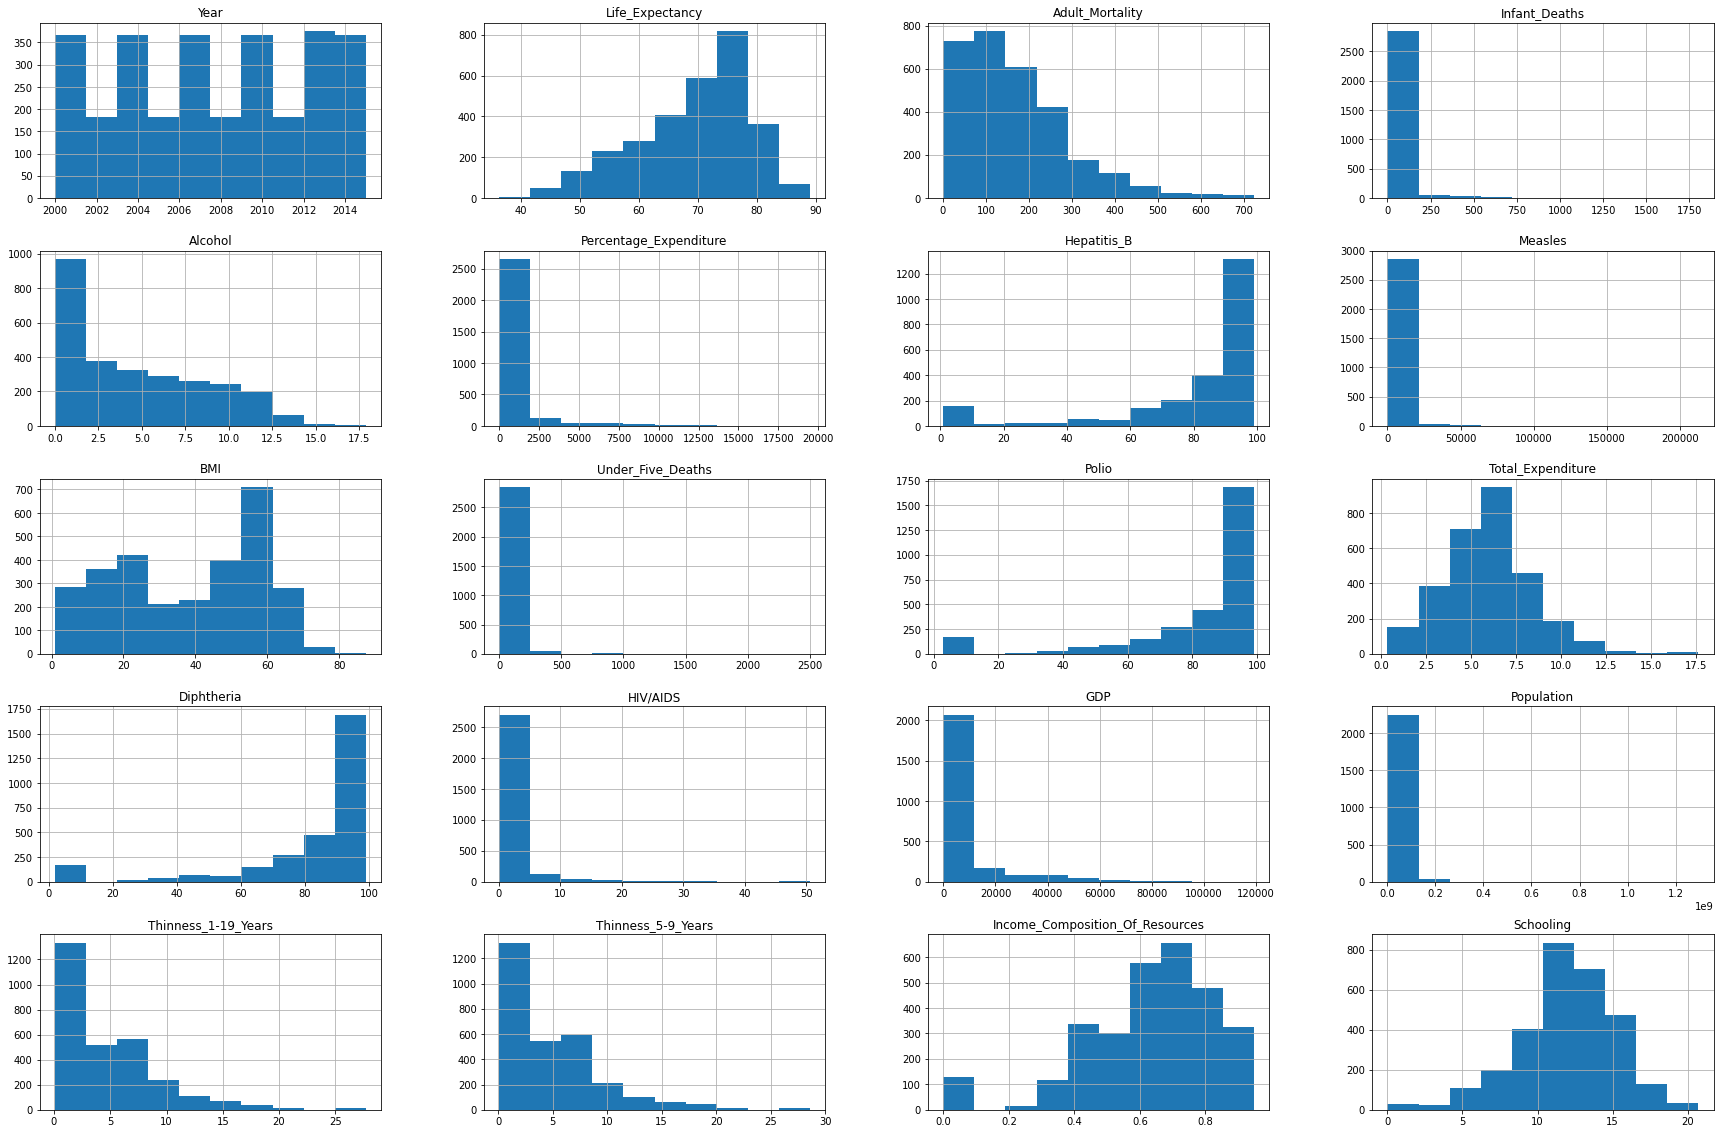

In [ ]:
#Distribution of data
#Checking for Distribution of Data
data.hist(figsize=(30,20))
plt.show();

In [ ]:
# Define the columns that have missing values and are normally distributed to be filled with the mean value
cols_with_missing_values = ['Total_Expenditure','Income_Composition_Of_Resources','Schooling','BMI','Life_Expectancy']

# Create an imputer object
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Iterate through the columns and fill the missing values
for col in cols_with_missing_values:
    data[col] = imputer.fit_transform(data[[col]])

In [ ]:
# Define the columns that have missing values and are skewed to be filled with the median value
cols_with_missing_values = ['Diphtheria','Adult_Mortality',]

# Create an imputer object
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Iterate through the columns and fill the missing values
for col in cols_with_missing_values:
    data[col] = imputer.fit_transform(data[[col]])

In [ ]:
#Removing unnecessary spaces in the column names to have uniformity
data.columns = data.columns.str.strip()

In [ ]:
#Renaming the columns to appropriate names
data.rename(columns={'Life expectancy':'Life_Expectancy',
                   'Adult Mortality':'Adult_Mortality',
                   'infant deaths':'Infant_Deaths',
                   'percentage expenditure':'Percentage_Expenditure',
                   'Hepatitis B':'Hepatitis_B',
                   'under-five deaths':'Under_Five_Deaths',
                   'Total expenditure':'Total_Expenditure',
                   'thinness  1-19 years':'Thinness_1-19_Years',
                   'thinness 5-9 years':'Thinness_5-9_Years',
                   'Income composition of resources':'Income_Composition_Of_Resources'
                  }, inplace=True)

#Checking to confirm if the changes have been implemented
data.columns


Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_Years',
       'Thinness_5-9_Years', 'Income_Composition_Of_Resources', 'Schooling'],
      dtype='object')

In [ ]:
#Checking the data types
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life_Expectancy                    float64
Adult_Mortality                    float64
Infant_Deaths                        int64
Alcohol                            float64
Percentage_Expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
Under_Five_Deaths                    int64
Polio                              float64
Total_Expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
Thinness_1-19_Years                float64
Thinness_5-9_Years                 float64
Income_Composition_Of_Resources    float64
Schooling                          float64
dtype: object

In [ ]:
#Statistical description of our numerical variables
data.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


From the statistical description it is clear that there are outliers in some of the columns namely Infant Deaths, Measles, BMI, Under Five Deaths and GDP. They will be explored more in detail later on.

# Checking for outliers in our features.

Schooling

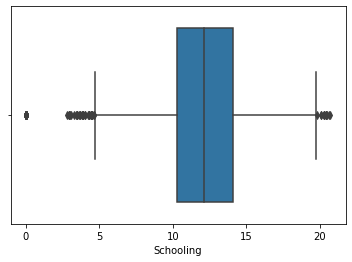

In [ ]:
sns.boxplot(data=data, x='Schooling')

It is possible that there are people who have never gone to school and the number used to represent them is 0. They will not be removed.

# Adult_Mortality

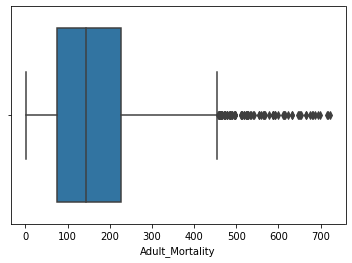

In [ ]:
sns.boxplot(data=data, x='Adult_Mortality')

They will be kept because there are countries where the population is huge and the numbers seem reasonable.

# BMI

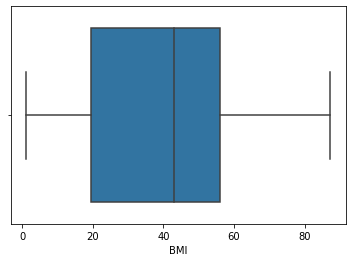

In [ ]:
sns.boxplot(data=data, x='BMI')

There are no outliers in BMI

# Diphtheria

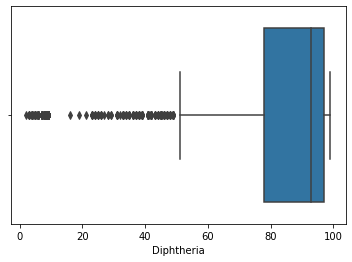

In [ ]:
sns.boxplot(data=data, x='Diphtheria')

The outliers will not be dropped because they all seem reasonable.

# **5. Exploratory Data Analysis**


## **a. Univariate**

# Life Expectancy

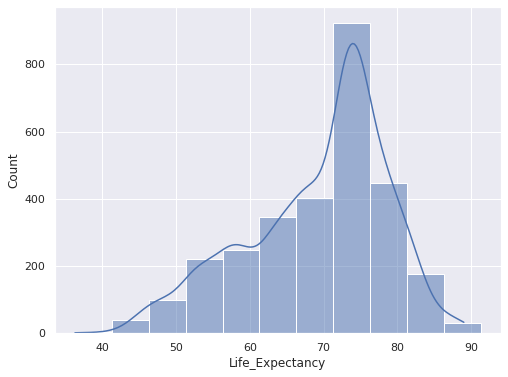

In [ ]:
#Distribution of life expectancy
sns.set(rc={"figure.figsize":(8, 6)})
sns.histplot(data = data, x='Life_Expectancy', kde=True, binwidth=5);

Majority of people have a life expectancy of between the age of 72-76

# Adult Mortality

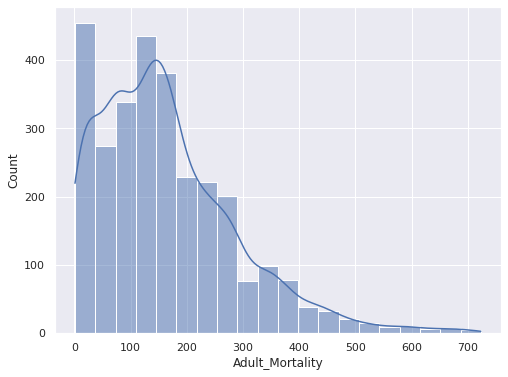

In [ ]:
sns.histplot(data=data, x='Adult_Mortality', kde=True, bins=20);

People have a low probability of dying while young, that is between the ages of 15 and 60 years per 1000 population

# Status

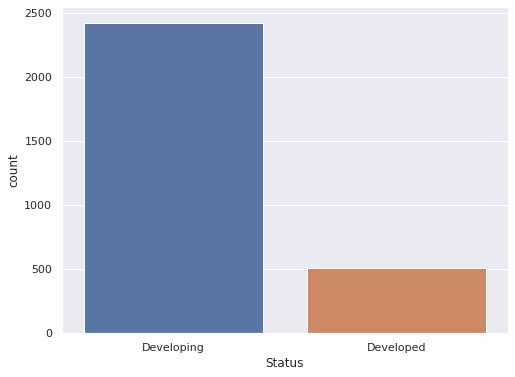

In [ ]:
sns.countplot(data=data, x='Status');

There are more developing country than developed country in the dataset

# BMI

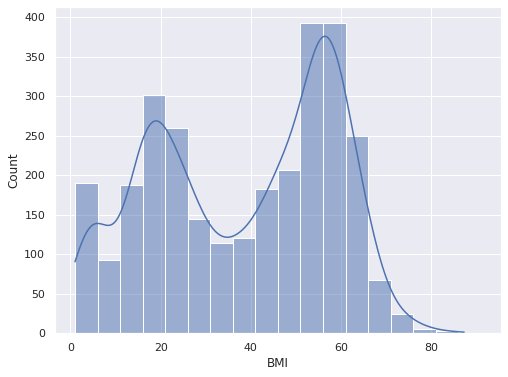

In [ ]:
sns.histplot(data=data, x='BMI', kde=True, binwidth=5);

Most people have a BMI range of 51-61 which is in the obese category





# Thinness: 1-19_Years

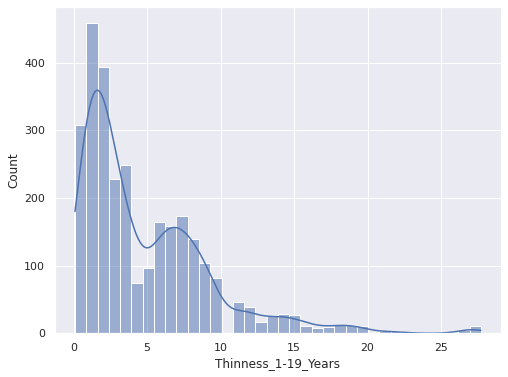

In [ ]:
sns.histplot(data=data, x='Thinness_1-19_Years', kde=True);

Most of the children and adolescents are very thin

# Schooling

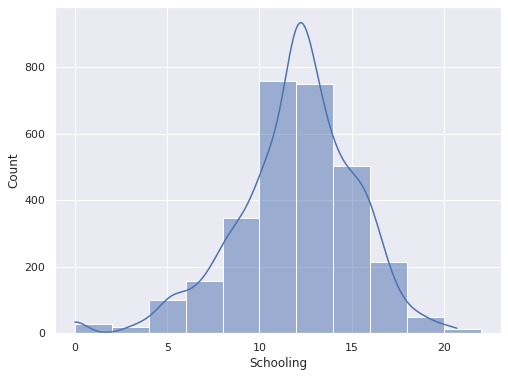

In [ ]:
sns.histplot(data=data, x='Schooling', kde=True, binwidth=2);

Most people spend 12-14 years in school, the distribution is relatively normal.

## **b. Bivariate**

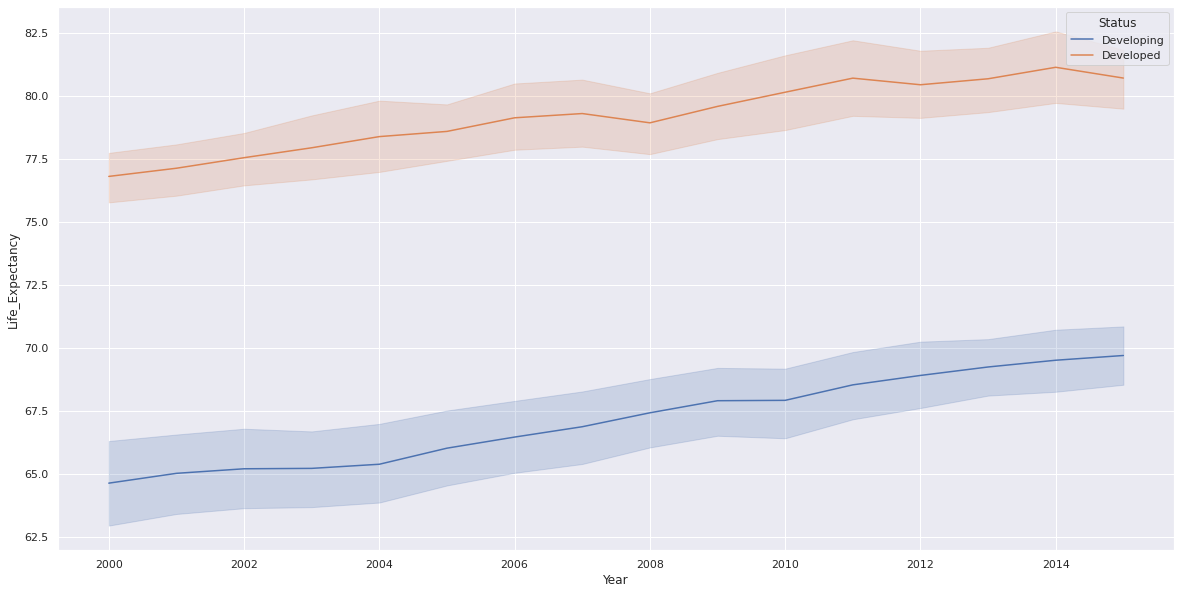

In [ ]:
#Looking at life expectancy in developed versus developing countries
f, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=data, x='Year', y='Life_Expectancy', hue='Status')

Developed countries have a higher life expectancy than developing countries, also with increase in years, the life expectancy is increasing in all countries.

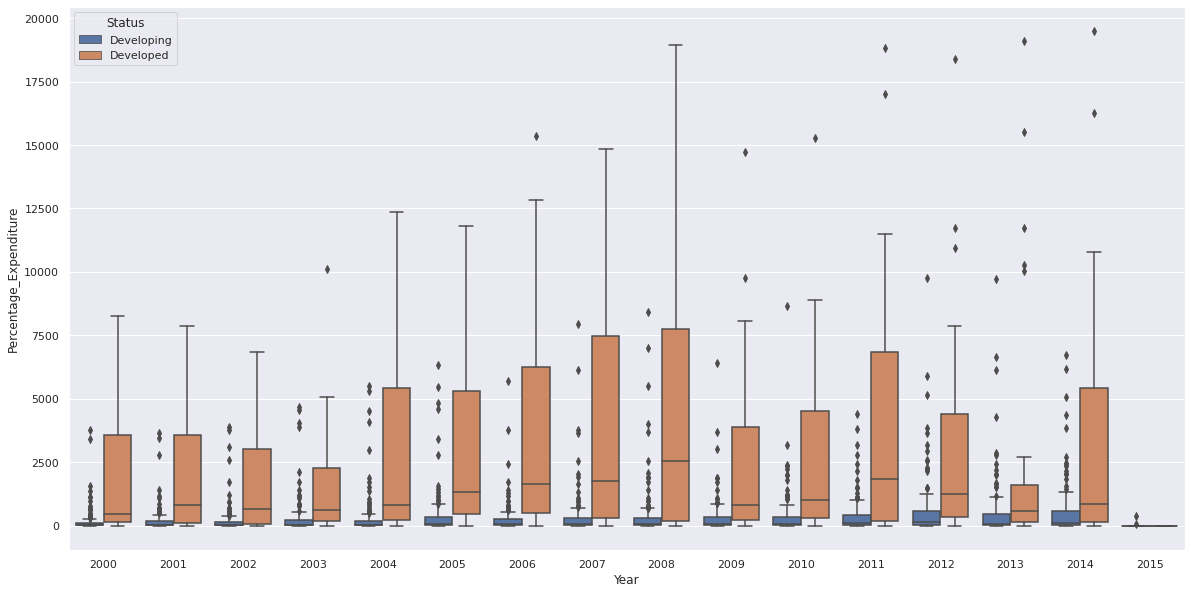

In [ ]:
#Looking at percentage expenditure in developed versus developing countries
f, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(data=data, x='Year', y='Percentage_Expenditure', hue='Status')

Developed countries spend more on health than developing countries.

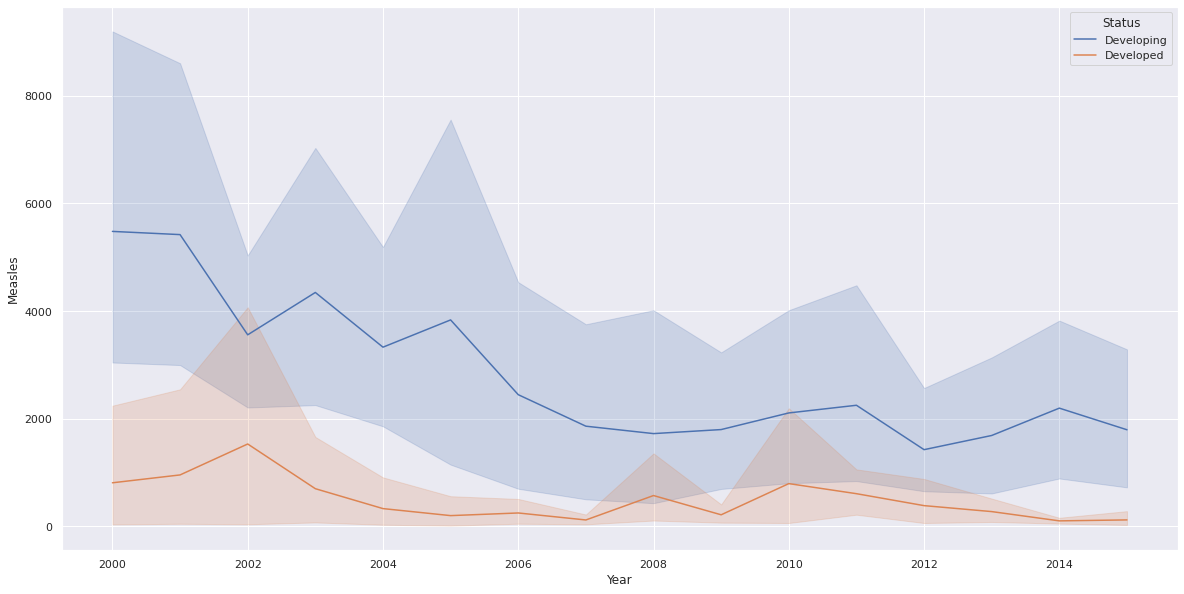

In [ ]:
#Looking at measles report cases in developed versus developing countries
f, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=data, x='Year', y='Measles', hue='Status')

The number of measles cases were more in developing countries than the developed ones. In the developing countries, there was a descrease in the number of reported cases over the years.

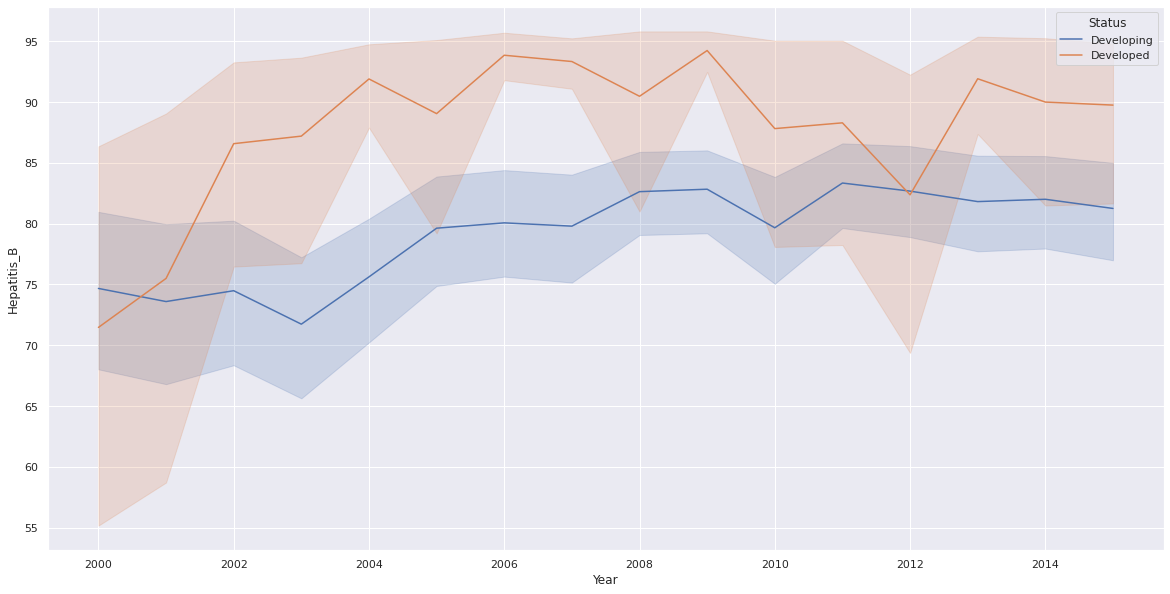

In [ ]:
#Looking at Hepatitis_B immunization in developed versus developing countries
f, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=data, x='Year', y='Hepatitis_B', hue='Status')

The Developed countries have more Immunization coverage among 1 year olds as compared to the Developing countries

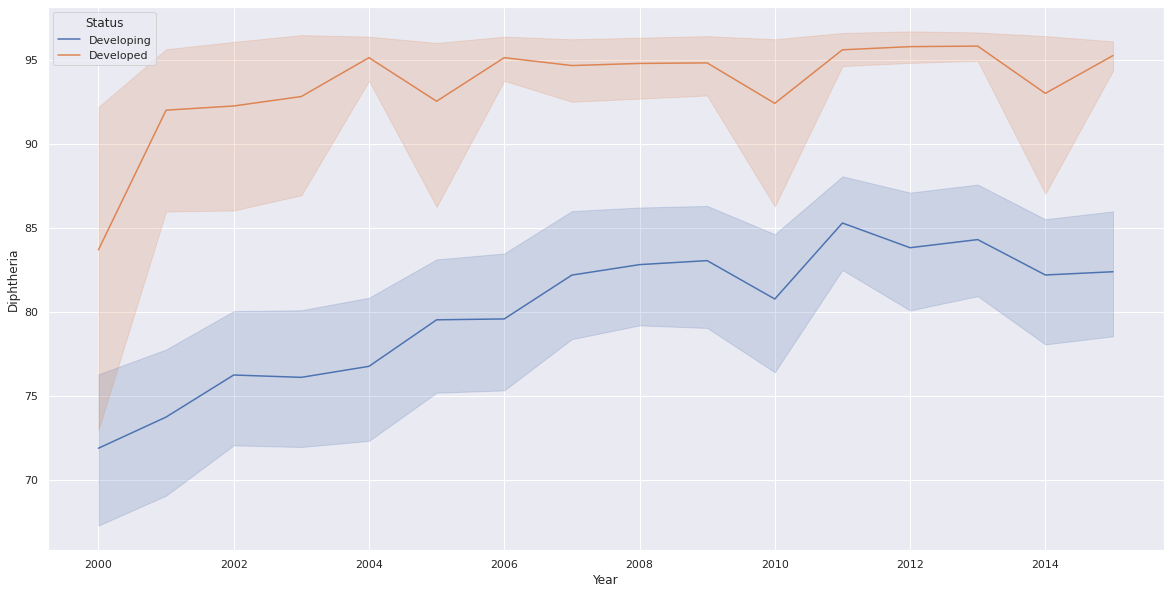

In [ ]:
#Looking at diphtheria immunization in developed versus developing countries
f, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=data, x='Year', y='Diphtheria', hue='Status')

The Developed countries have more Immunization coverage among 1 year olds as compared to the Developing countries

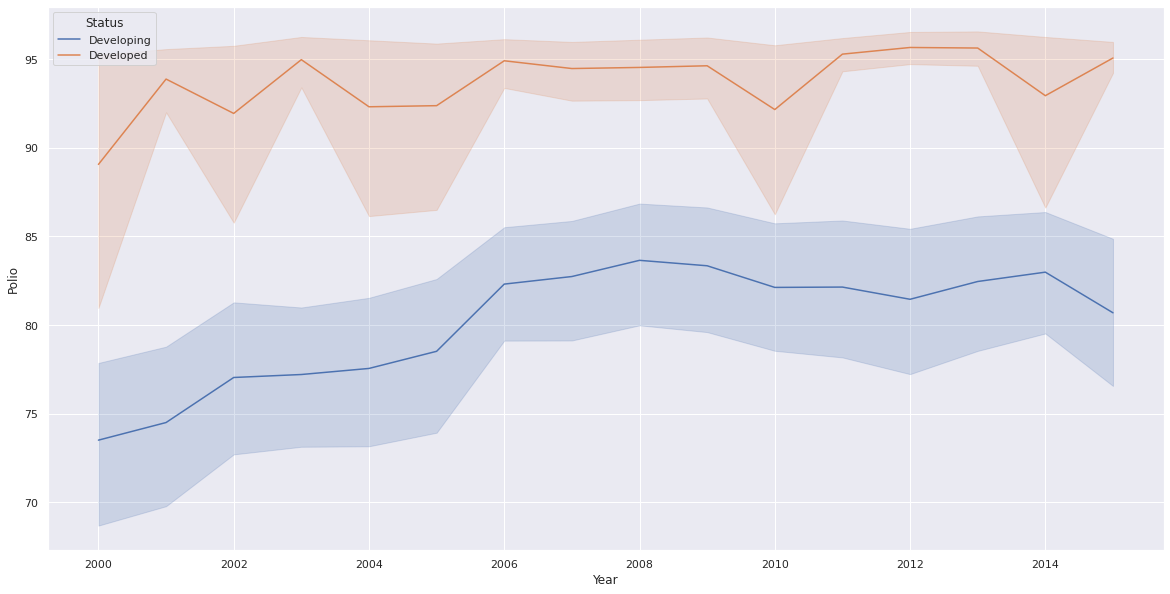

In [ ]:
#Looking at polio immunization in developed versus developing countries
f, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=data, x='Year', y='Polio', hue='Status')

Developed countries have more immunization coverage among 1-year-olds.

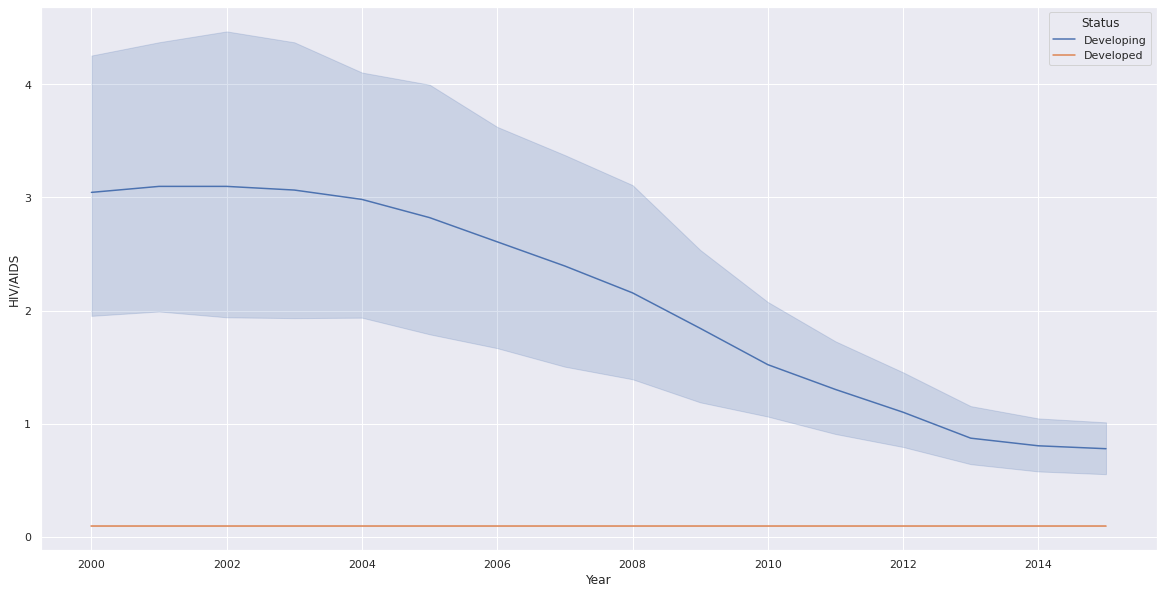

In [ ]:
#Looking at number of HIV reported deaths in developed versus developing countries
f, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=data, x='Year', y='HIV/AIDS', hue='Status')

The number of deaths in Developing countries reduced over the years whereas there were low deaths in the Developed countries.

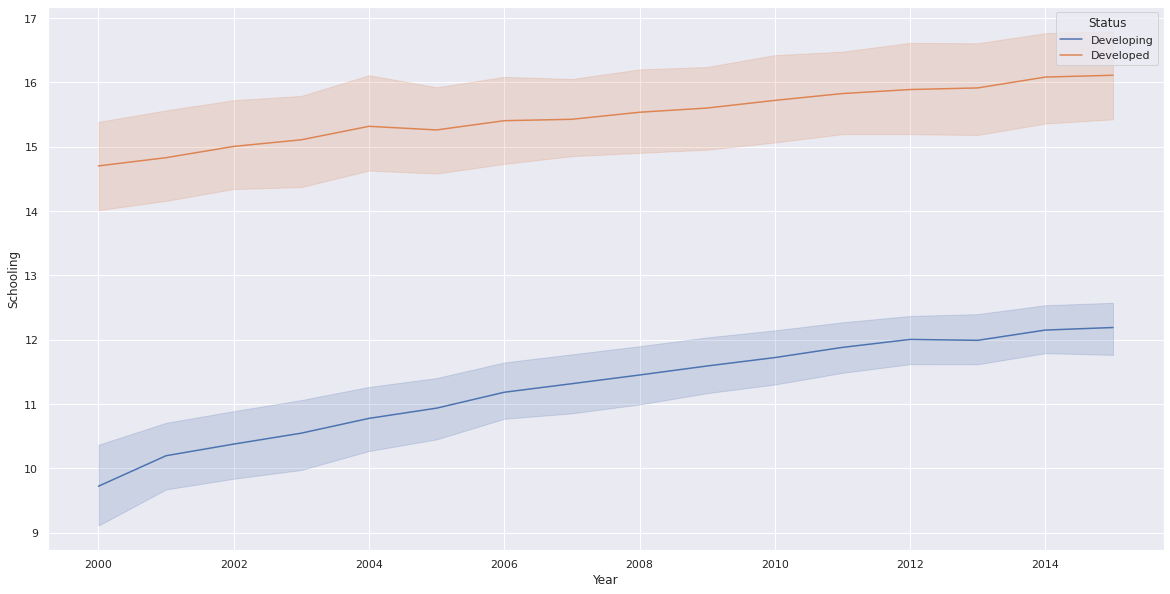

In [ ]:
#Looking at school years in developed versus developing countries
f, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=data, x='Year', y='Schooling', hue='Status')

More people in developed countries have spent more years in school as compared to those on the developing countries. There is a general increase in the number of years people go to school.

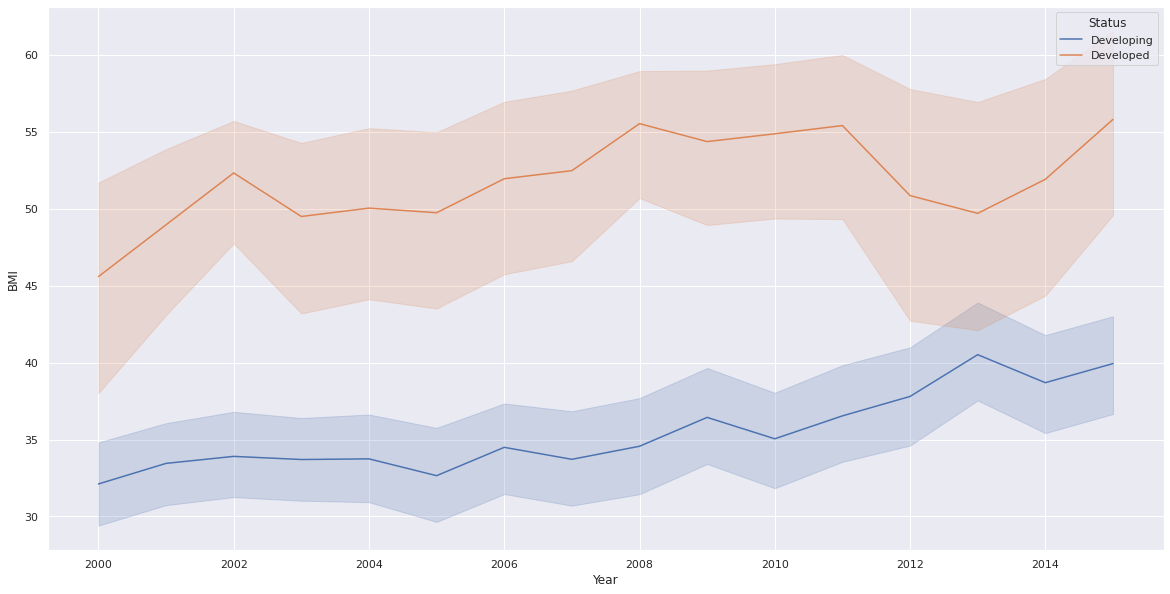

In [ ]:
#Looking at BMI in developed versus developing countries
f, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=data, x='Year', y='BMI', hue='Status')

The developed countries have a higher BMI rate than the developing countries.

# **6. Modelling**

# Building the Model:

Starting with the base model, schooling will be the independent variable.

In [ ]:
data_subset = data[['Schooling', 'Adult_Mortality', 'Diphtheria', 'BMI', 'Life_Expectancy']].copy()
data_subset


,Schooling,Adult_Mortality,Diphtheria,BMI,Life_Expectancy
0,10.1,263.0,65.0,19.1,65.0
1,10.0,271.0,62.0,18.6,59.9
2,9.9,268.0,64.0,18.1,59.9
3,9.8,272.0,67.0,17.6,59.5
4,9.5,275.0,68.0,17.2,59.2
...,...,...,...,...,...
2933,9.2,723.0,65.0,27.1,44.3
2934,9.5,715.0,68.0,26.7,44.5
2935,10.0,73.0,71.0,26.3,44.8
2936,9.8,686.0,75.0,25.9,45.3


In [ ]:
#Checking for the correlations of subset to ascertain that they are indeed correlated
data_subset.corr()['Life_Expectancy']

Schooling          0.715066
Adult_Mortality   -0.696326
Diphtheria         0.472253
BMI                0.559255
Life_Expectancy    1.000000
Name: Life_Expectancy, dtype: float64

# Base Model Development

Schooling is most correlated with Life Expectancy, it will be used as the base model.

In [ ]:
y = data_subset['Life_Expectancy']
X_baseline = data_subset[['Schooling']]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())


                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     3072.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        05:24:59   Log-Likelihood:                -9733.1
No. Observations:                2938   AIC:                         1.947e+04
Df Residuals:                    2936   BIC:                         1.948e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2480      0.467     94.744      0.0

1. The model is statistically significant overall, and explains about 51% of the variance in Life Expectancy.

2. Both the intercept and the coefficient for Schooling are statistically significant.

3. If a person had 0 schooling years, their life expectancy would be 44 years.

4. For each increase of 1 schooling year, there is an associated increase in 2 years of life expectancy.



# Multilinear Regression

In [ ]:
#Fitting linear regression to base model

X = data_subset.drop("Life_Expectancy", axis=1)

model1 = sm.OLS(y, sm.add_constant(X))
model1_results = model1.fit()

print(model1_results.summary())




                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     2062.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        05:24:59   Log-Likelihood:                -8819.1
No. Observations:                2938   AIC:                         1.765e+04
Df Residuals:                    2933   BIC:                         1.768e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              52.6434      0.513    1

1. The new model is statistically significant overall, and explains about 74% of the variance in Life Expectancy. This is about 23% more variance explained than the simple model.

2. The model coefficients (const, Schooling, Adult Mortality, Diphtheria and BMI) are all statistically significant, with t-statistic p-values well below 0.05

3. For each increase of 1 school year in schooling, there is an associated increase in life expectancy of about 1.1364 years

4. For each increase of 1 adult mortality, there is an associated decrease in life expectancy of about 0.03 years

5. For each increase of 1 Diphtheria immunization, there is an associated increase in life expectancy of about 0.06 years

6. For each increase of 1 BMI range, there is an associated increase in life expectancy of about 0.07 years


# Dealing with categorical variables

In [ ]:
#This will be the categorical column
categoricals = data.select_dtypes("object")

for col in categoricals:
    print(data[col].value_counts(), "\n")

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64 

Developing    2426
Developed      512
Name: Status, dtype: int64 



Status will be the categorical column for this project.

# Building a model with a categorical variable

In [ ]:
data_final = data[['Schooling', 'Adult_Mortality', 'Diphtheria', 'BMI', 'Life_Expectancy', 'Status']].copy()
data_final

,Schooling,Adult_Mortality,Diphtheria,BMI,Life_Expectancy,Status
0,10.1,263.0,65.0,19.1,65.0,Developing
1,10.0,271.0,62.0,18.6,59.9,Developing
2,9.9,268.0,64.0,18.1,59.9,Developing
3,9.8,272.0,67.0,17.6,59.5,Developing
4,9.5,275.0,68.0,17.2,59.2,Developing
...,...,...,...,...,...,...
2933,9.2,723.0,65.0,27.1,44.3,Developing
2934,9.5,715.0,68.0,26.7,44.5,Developing
2935,10.0,73.0,71.0,26.3,44.8,Developing
2936,9.8,686.0,75.0,25.9,45.3,Developing


In [ ]:
# Using Binary Encoding to encode the Status column
data_ce = data_final.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Status'])
data_binary = encoder.fit_transform(data_ce)

# Display the head
data_binary.head()

,Schooling,Adult_Mortality,Diphtheria,BMI,Life_Expectancy,Status_0,Status_1
0,10.1,263.0,65.0,19.1,65.0,0,1
1,10.0,271.0,62.0,18.6,59.9,0,1
2,9.9,268.0,64.0,18.1,59.9,0,1
3,9.8,272.0,67.0,17.6,59.5,0,1
4,9.5,275.0,68.0,17.2,59.2,0,1


In [ ]:
# Renaming the Status columns for better interpretability
data_binary.rename(columns = {"Status_0" : "Developing_Status", "Status_1" : "Developed_Status"}, inplace = True)

# Checking the data types of the columns
data_binary.dtypes

Schooling            float64
Adult_Mortality      float64
Diphtheria           float64
BMI                  float64
Life_Expectancy      float64
Developing_Status      int64
Developed_Status       int64
dtype: object

In [ ]:
# Dropping one of the status columns and making a new copy for the dataset
data_final_2 = data_binary[['Schooling', 'Adult_Mortality', 'Diphtheria', 'BMI', 'Life_Expectancy', 'Developed_Status']].copy()
data_final_2

,Schooling,Adult_Mortality,Diphtheria,BMI,Life_Expectancy,Developed_Status
0,10.1,263.0,65.0,19.1,65.0,1
1,10.0,271.0,62.0,18.6,59.9,1
2,9.9,268.0,64.0,18.1,59.9,1
3,9.8,272.0,67.0,17.6,59.5,1
4,9.5,275.0,68.0,17.2,59.2,1
...,...,...,...,...,...,...
2933,9.2,723.0,65.0,27.1,44.3,1
2934,9.5,715.0,68.0,26.7,44.5,1
2935,10.0,73.0,71.0,26.3,44.8,1
2936,9.8,686.0,75.0,25.9,45.3,1


In [ ]:
#Fitting multilinear regression to model

X_final_2 = data_final_2.drop("Life_Expectancy", axis=1)
y_2 = data_final_2["Life_Expectancy"]

model_2 = sm.OLS(y, sm.add_constant(X_final_2))
model_2_results = model_2.fit()

print(model_2_results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1713.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        05:26:13   Log-Likelihood:                -8777.6
No. Observations:                2938   AIC:                         1.757e+04
Df Residuals:                    2932   BIC:                         1.760e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               56.1163      0.632  

The new model is statistically significant overall, and explains about 75% of the variance in Life Expectancy. This is about 1% more variance explained than the first regression model.
The fact that only one predictor was added and it increased the R square by 1% is an indicator that this is not a very good model.

Standardizing may help improve this model

# Standardizing


The condition number (Cond. No.) is a measure of the sensitivity of the model to the condition of the independent variables. A higher condition number means that the model is more sensitive to the condition of the independent variables.

In [ ]:
# Standardize the variables by zero centering
data_standardized = data_final_2.copy()
for col in data_standardized:
    data_standardized[col] = (data_standardized[col] - data_standardized[col].mean()) / data_standardized[col].std()
data_standardized.describe()

,Schooling,Adult_Mortality,Diphtheria,BMI,Life_Expectancy,Developed_Status
count,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03
mean,5.320606e-16,3.869532e-17,-1.753381e-16,2.720764e-16,8.101832e-16,7.013526e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.673833e+00,-1.319451e+00,-3.398487e+00,-1.872835e+00,-3.462997e+00,-2.176389e+00
25%,-5.185647e-01,-7.311502e-01,-1.857121e-01,-9.494959e-01,-6.336937e-01,4.593203e-01
50%,3.284151e-02,-1.670263e-01,4.483882e-01,2.347867e-01,2.918777e-01,4.593203e-01
75%,6.455150e-01,5.018635e-01,6.174816e-01,8.921639e-01,6.705206e-01,4.593203e-01
max,2.667338e+00,4.499084e+00,7.020284e-01,2.457826e+00,2.079913e+00,4.593203e-01


In [ ]:
#Fitting linear regression to the base model

X_final_3 = data_standardized.drop("Life_Expectancy", axis=1)
y_new = data_standardized["Life_Expectancy"]

model_3 = sm.OLS(y, sm.add_constant(X_final_3))
model_3_results = model_3.fit()

print(model_3_results.summary())


                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1713.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:35:36   Log-Likelihood:                -8777.6
No. Observations:                2938   AIC:                         1.757e+04
Df Residuals:                    2932   BIC:                         1.760e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               69.2249      0.089  

The new model is statistically significant overall, and explains about 75% of the variance in Life Expectancy. This is the same as before standardization. 

The intercept and coefficients are statistically significant and the condition number has greatly reduced from the previous model, thus it is a better model compared to the first.

The coefficients have changed from the above model.

1. For each increase of 1 standard deviation in the number of schooling years, there is an associated increase of about 3.3245 in life expectancy

2. For each increase of 1 standard deviation in the adult mortality, there is an associated decrease of about -4 in in life expectancy

3. For each increase of 1 standard deviation in Diphtheria, there is an associated increase of about 1.6 in life expectancy
4. For each increase of 1 standard deviation in BMI, there is an associated increase of about 1.4 in life expectancy
5. For each increase of 1 standard deviation in Developed_Status, there is an associated decrease of about -0.9 as compared to developing status

In [ ]:
#Checking the rmse of the model
rmse = ((model_3_results.resid ** 2).sum() / len(y_new)) ** 0.5
rmse

4.8003135524367595

For this specific RMSE value, it means that the model is off by about 4.8 years in a given prediction.



*   The model has an adjusted r-squared of 75%
*   The RMSE of the linear regression is 4.8 meaning that the model will give predictions off by that value 



# Challenging the solution

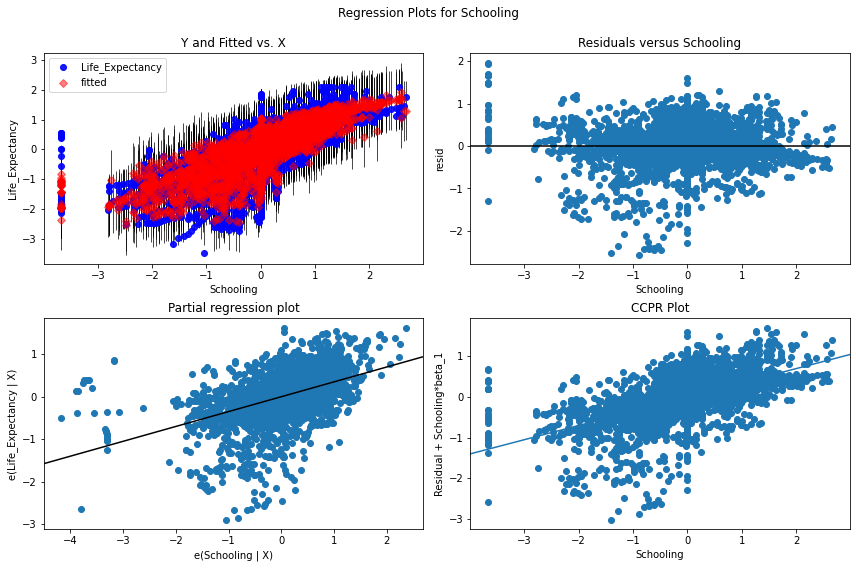

In [ ]:
sm.graphics.plot_regress_exog(model_3_results, "Schooling", fig=plt.figure(figsize=(12,8)));


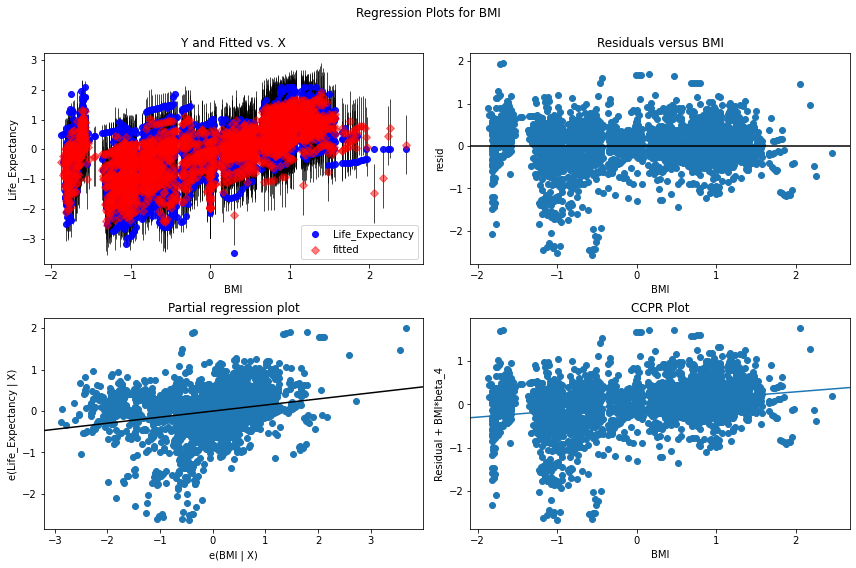

In [ ]:
sm.graphics.plot_regress_exog(model_3_results, "BMI", fig=plt.figure(figsize=(12,8)));


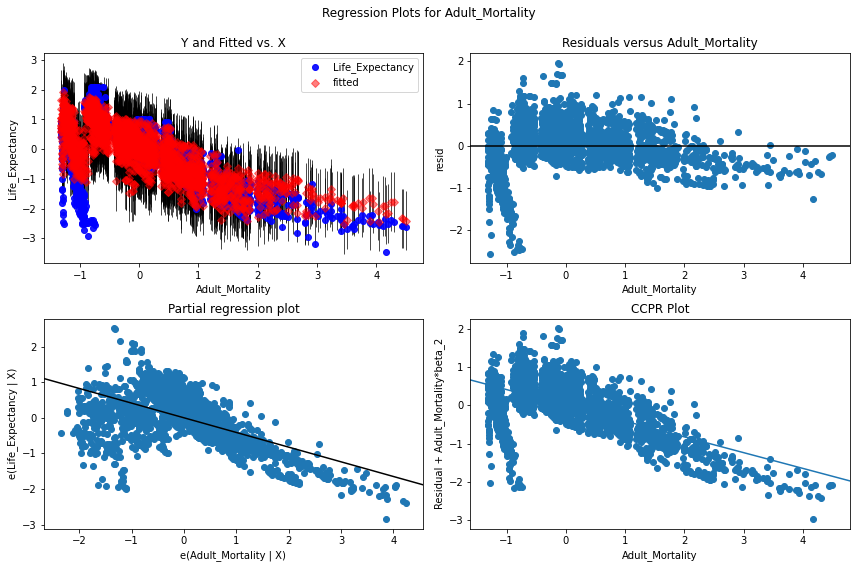

In [ ]:
sm.graphics.plot_regress_exog(model_3_results, "Adult_Mortality", fig=plt.figure(figsize=(12,8)));

In conclusion the model is heteroscedastic but the prediction is 74.5% in life expectancy of the variance which is fairly good.

# **7 . Conclusion**



*   The number of years one spends in school has a positive increase in their life expectancy
*  Getting immunized increases one's life expectancy



*   The BMI range of a person also directly affects their life expectancy. People who are in the middle range, meaning neither too thin nor too fat have longer life spans.
*   Developed Nations have better health care expenditure and thus their life expectancy is higher compared to the developed countries.


*   Developing countries have a lower life expectancy as compared to developed countries. This can be attributed to civil wars and economical crisis.










# **8. Recommendations**
1. Being immunized against various diseases through vacination greatly increases the life expectancy of an individual.

2. Going to school directly affects an individual because they are more prone to take vaccines and immunization shots for them and their families due to the knowledge they gain in school.

3. Health expenditure directly affects the life expectancy of people since they have access to medical care and can be given medication when they are sick.

# **9. Follow up questions**

At this point, we can refine the question or collect new data, all in an iterative process to get at the truth.

a). Was the data accurate?
Yes the data was correct and verified

b). Is there need for other data to answer our question?
No the data was sufficient but more could be collected so that the data could be up to date and some clarification on the columns would be nice.

c). Was the right question asked?
The question chosen was correct 